In [54]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [46]:
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))
E

array([[0.03745401, 0.09507143, 0.07319939, ..., 0.05247564, 0.0431945 ,
        0.02912291],
       [0.06118529, 0.01394939, 0.02921446, ..., 0.00976721, 0.0684233 ,
        0.04401525],
       [0.01220382, 0.04951769, 0.00343885, ..., 0.01959829, 0.00452273,
        0.03253303],
       ...,
       [0.02653261, 0.06015539, 0.02965599, ..., 0.08616909, 0.02740716,
        0.08070709],
       [0.01952406, 0.0345342 , 0.03356105, ..., 0.0011418 , 0.07036998,
        0.09702571],
       [0.04376613, 0.02349734, 0.0704871 , ..., 0.03097879, 0.02900455,
        0.0871414 ]])

In [47]:
X = np.hstack((X, E))
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,5.1,3.5,1.4,0.2,0.037454,0.095071,0.073199,0.059866,0.015602,0.015599,...,0.002058,0.096991,0.083244,0.021234,0.018182,0.018340,0.030424,0.052476,0.043195,0.029123
1,4.9,3.0,1.4,0.2,0.061185,0.013949,0.029214,0.036636,0.045607,0.078518,...,0.060754,0.017052,0.006505,0.094889,0.096563,0.080840,0.030461,0.009767,0.068423,0.044015
2,4.7,3.2,1.3,0.2,0.012204,0.049518,0.003439,0.090932,0.025878,0.066252,...,0.096958,0.077513,0.093950,0.089483,0.059790,0.092187,0.008849,0.019598,0.004523,0.032533
3,4.6,3.1,1.5,0.2,0.038868,0.027135,0.082874,0.035675,0.028093,0.054270,...,0.077224,0.019872,0.000552,0.081546,0.070686,0.072901,0.077127,0.007404,0.035847,0.011587
4,5.0,3.6,1.4,0.2,0.086310,0.062330,0.033090,0.006356,0.031098,0.032518,...,0.011959,0.071324,0.076079,0.056128,0.077097,0.049380,0.052273,0.042754,0.002542,0.010789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.012787,0.076555,0.000001,0.041657,0.052251,0.005463,...,0.023042,0.000147,0.072934,0.096685,0.022429,0.066305,0.074190,0.084843,0.042263,0.030293
146,6.3,2.5,5.0,1.9,0.032530,0.071262,0.081678,0.018161,0.037094,0.090194,...,0.059064,0.066101,0.007846,0.054450,0.070932,0.016732,0.078063,0.058377,0.095222,0.004242
147,6.5,3.0,5.2,2.0,0.026533,0.060155,0.029656,0.071442,0.075901,0.010252,...,0.082751,0.069721,0.071433,0.046172,0.092099,0.069460,0.072898,0.086169,0.027407,0.080707
148,6.2,3.4,5.4,2.3,0.019524,0.034534,0.033561,0.097853,0.085654,0.070117,...,0.038052,0.016304,0.078621,0.073444,0.038436,0.002519,0.083900,0.001142,0.070370,0.097026


In [48]:
X_indices = np.arange(X.shape[-1])
X_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(112, 24)
(38, 24)


# Univariate Feature Selection
Compute the ANOVA F-value (score function) for all features, select the k=2 highest scoring features

In [61]:
selector = SelectKBest(f_classif, k=4)
X_new = selector.fit_transform(X_train, y_train)
X_new.shape

(112, 4)

In [64]:
scores = selector.pvalues_
print(scores.max())
scores

0.9950226727824041


array([2.76257198e-22, 7.11969002e-11, 1.35573627e-66, 1.85716371e-61,
       7.11138548e-01, 9.95022673e-01, 1.39812537e-01, 6.93935493e-01,
       5.89860280e-02, 3.47254348e-01, 8.50038333e-01, 2.75413134e-01,
       8.00397543e-01, 5.70802310e-01, 4.14994512e-01, 3.70454950e-01,
       8.07364695e-01, 3.80952241e-01, 5.28971385e-02, 9.81737510e-01,
       8.26092301e-01, 8.55061820e-01, 4.58543617e-01, 3.68764857e-01])

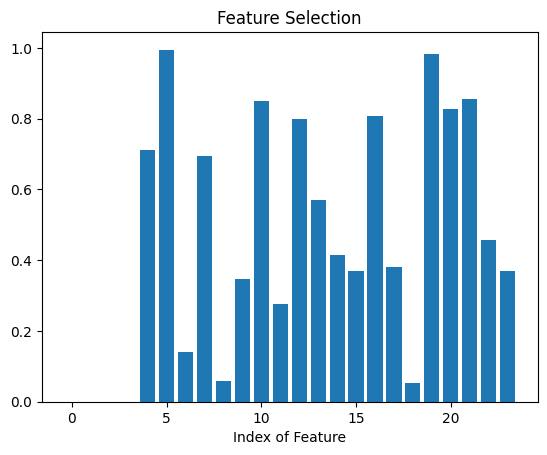

In [69]:
plt.bar(X_indices, scores)
plt.xlabel("Index of Feature")
plt.title("Feature Selection")
plt.show()